In [19]:
! python -m pip install --upgrade pip
! python -m pip install pandas
! python -m pip install numpy
! python -m pip install matplotlib
! python -m pip install scikit-learn
! python -m pip install fsspec

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [21]:
filePath = r"C:\D_Drive\WorkSpace\ds_and_ml\datasets\housing_data\house_price.csv"
df = pd.read_csv("../datasets/house_price_data.csv", on_bad_lines='skip')
plt_data = df[~((df['PRICE'].str.contains('-')) | (df['AREA'] > 10000))]
# filtered = plt_data.AREA[plt_data.AREA > 6000]
# filtered
plt_data.head(30)


,PRICE,AREA
0,39 L,920.0
1,27.28 L,535.0
2,92 L,1940.0
3,42 L,910.0
4,54.66 L,1163.0
5,42.35 L,901.0
6,75.92 L,1460.0
7,54.6 L,1050.0
8,37.94 L,1084.0
9,29.5 L,838.0


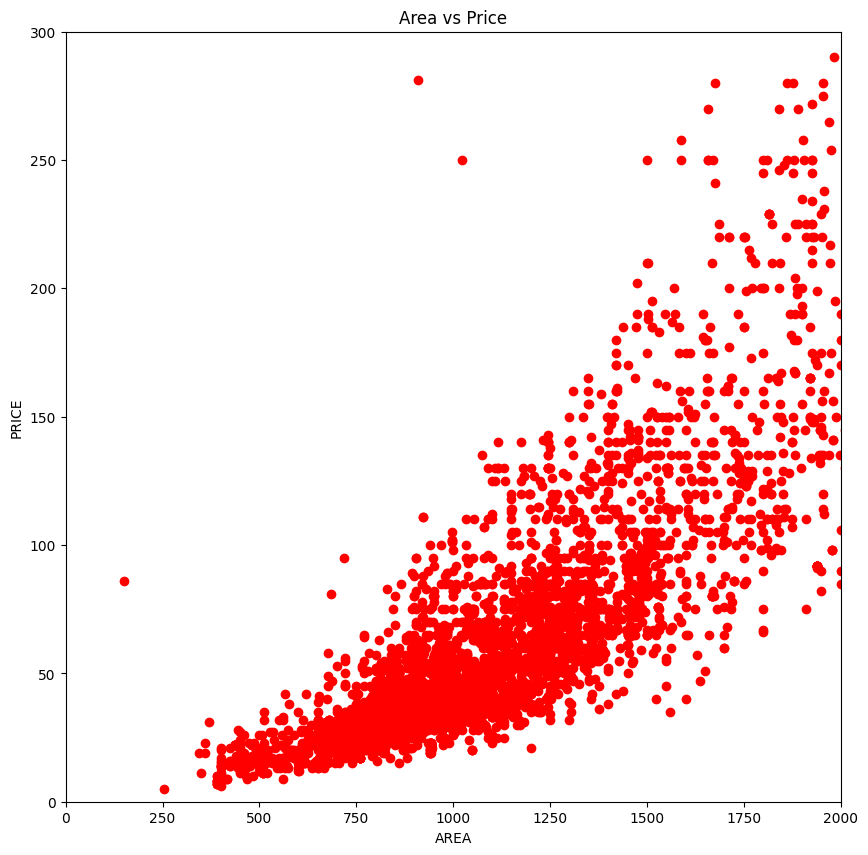

In [22]:
%matplotlib inline
plt.figure(figsize=(10, 10)) 
plt.xlabel('AREA')
plt.ylabel('PRICE')
y_value = [
	int(float(val.replace('L', '').strip())) if 'L' in val else
	int(float(val.replace('Cr', '').strip()) * 100)
	for val in plt_data['PRICE']
]

plt.xlim(0, 2000)
plt.ylim(0, 300)
plt.scatter(plt_data.AREA, y_value, color='red', marker='o')
plt.ticklabel_format(style='plain', axis='both')
plt.title('Area vs Price')
plt.show()

In [23]:
reg = linear_model.LinearRegression()
reg.fit(plt_data[['AREA']], y_value)

LinearRegression()

In [24]:
reg.predict([[6000]])

c:\Users\rick2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([869.32794969])

In [25]:
reg.coef_

array([0.16476034])

In [26]:
reg.intercept_

np.float64(-119.23411349089146)

In [27]:
16467.11034563*6000 + (-11894898.669035397)

86907763.4047446

In [28]:
86907763.40476915 - 86907763.4047446

2.4557113647460938e-05

In [29]:
d = pd.read_csv('../op_values/Test_Data.csv')
predcited_price = reg.predict(d)
predcited_price
d['PRICE'] = predcited_price
d.to_csv('Predicted_Price.csv', index=False)

In [30]:
reg.coef_*1000 + reg.intercept_

array([45.52623037])

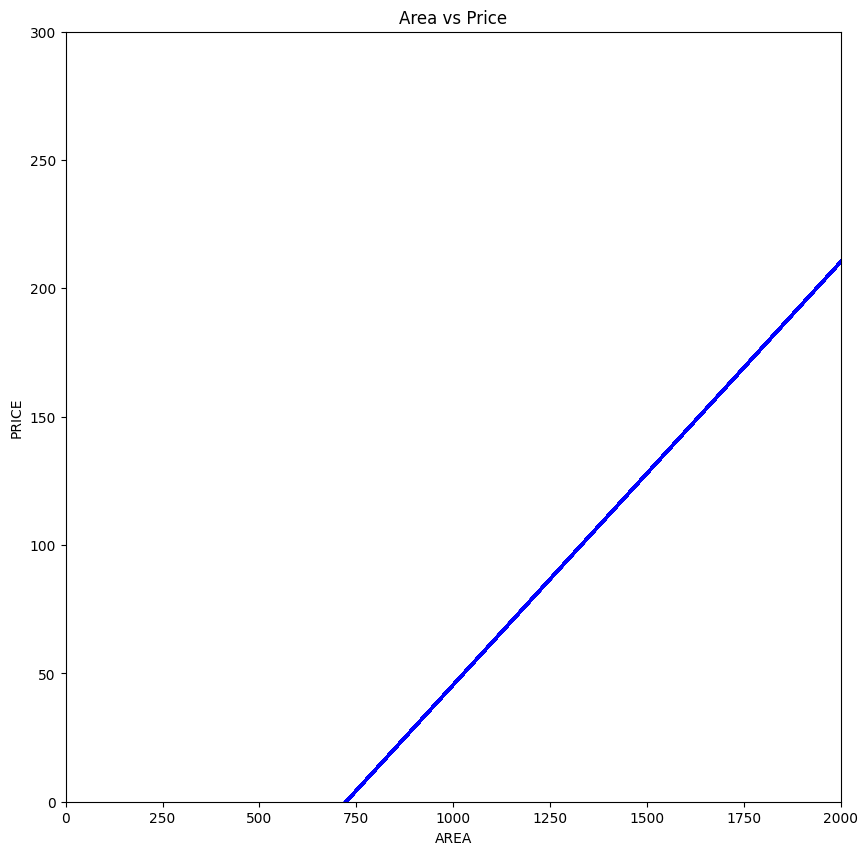

In [31]:
%matplotlib inline
plt.figure(figsize=(10, 10)) 
plt.xlabel('AREA')
plt.ylabel('PRICE')
y_value = [
	int(float(val.replace('L', '').strip()) * 100000) if 'L' in val else
	int(float(val.replace('Cr', '').strip()) * 10000000)
	for val in plt_data['PRICE']
]

plt.xlim(0, 2000)
plt.ylim(0, 300)
plt.scatter(plt_data.AREA, y_value, color='red', marker='o')
plt.ticklabel_format(style='plain', axis='both')
plt.title('Area vs Price')
plt.plot(plt_data.AREA, reg.predict(plt_data[['AREA']]), color='blue', linewidth=2)
plt.show()

In [32]:
import pickle
with open('../artifacts/model.pickle', 'wb') as file:
    pickle.dump(reg, file)

In [33]:
with open('../artifacts/model.pickle', 'rb') as file:
    model_pickle = pickle.load(file)
model_pickle.predict([[6000]])

c:\Users\rick2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([869.32794969])

In [34]:
import joblib
joblib.dump(reg, '../artifacts/model.joblib')

['../artifacts/model.joblib']

In [35]:
model_joblib = joblib.load('../artifacts/model.joblib')
model_joblib.predict([[6000]])

c:\Users\rick2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([869.32794969])